# Singapore GP 2022 resume

This jupyter notebook contains some insights about the Singapore Grand Prix runned in Marina Bay Street Circuit on October 2nd 2022

## Setup

First let's load some libraries that will be useful

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Load information

The information is taken from the website of pitwall.app, the data is the time lap from the drivers and the position, let's load the information of the top 6 drivers: Perez, Leclerc, Sainz, Norris, Ricciardo and Stroll

First lets load the information of Perez and Leclerc

In [2]:
info_1_2 = pd.read_html('https://pitwall.app/analysis/compare-lap-times?utf8=%E2%9C%93&season=74&race=1172&main_driver=11&compare_driver=3&button=')[0]

In [3]:
info_1_2.head()

,Lap,Driver,Pos,Time PER,Driver.1,Pos.1,Time LEC,Delta
0,1,#11 Sergio PÃ©rez,1st,2:05.369,#16 Charles Leclerc,2nd,2:06.402,-1.033
1,2,#11 Sergio PÃ©rez,1st,2:01.358,#16 Charles Leclerc,2nd,2:01.214,0.144
2,3,#11 Sergio PÃ©rez,1st,2:00.875,#16 Charles Leclerc,2nd,2:00.939,-0.064
3,4,#11 Sergio PÃ©rez,1st,2:00.310,#16 Charles Leclerc,2nd,2:00.734,-0.424
4,5,#11 Sergio PÃ©rez,1st,2:00.267,#16 Charles Leclerc,2nd,2:00.219,0.048


In [4]:
lap_per = info_1_2.set_index('Lap').drop(columns=['Driver','Driver.1','Pos.1','Time LEC','Delta'])
lap_per['Pos'] = [int(x[:-2]) for x in list(lap_per['Pos'])]

In [5]:
lap_per.head()

,Pos,Time PER
Lap,,
1,1,2:05.369
2,1,2:01.358
3,1,2:00.875
4,1,2:00.310
5,1,2:00.267


In [6]:
lap_lec = info_1_2.set_index('Lap').drop(columns=['Driver','Pos','Time PER','Driver.1','Delta'])
lap_lec = lap_lec.rename(columns={'Pos.1':'Pos'})
lap_lec['Pos'] = [int(x[:-2]) for x in list(lap_lec['Pos'])]

In [7]:
lap_lec.head()

,Pos,Time LEC
Lap,,
1,2,2:06.402
2,2,2:01.214
3,2,2:00.939
4,2,2:00.734
5,2,2:00.219


Now for the third and fourth place Sainz and Norris

In [8]:
info_3_4 = pd.read_html('https://pitwall.app/analysis/compare-lap-times?utf8=%E2%9C%93&season=74&race=1172&main_driver=8&compare_driver=7&button=')[0]

In [9]:
info_3_4.head()

,Lap,Driver,Pos,Time SAI,Driver.1,Pos.1,Time NOR,Delta
0,1,#55 Carlos Sainz,3rd,2:08.353,#4 Lando Norris,5th,2:12.029,-3.676
1,2,#55 Carlos Sainz,3rd,2:02.702,#4 Lando Norris,5th,2:04.065,-1.363
2,3,#55 Carlos Sainz,3rd,2:01.872,#4 Lando Norris,5th,2:02.717,-0.845
3,4,#55 Carlos Sainz,3rd,2:01.488,#4 Lando Norris,5th,2:02.313,-0.825
4,5,#55 Carlos Sainz,3rd,2:01.111,#4 Lando Norris,5th,2:02.322,-1.211


In [10]:
lap_sai = info_3_4.set_index('Lap').drop(columns=['Driver','Driver.1','Pos.1','Time NOR','Delta'])
lap_sai['Pos'] = [int(x[:-2]) for x in list(lap_sai['Pos'])]

In [11]:
lap_sai.head()

,Pos,Time SAI
Lap,,
1,3,2:08.353
2,3,2:02.702
3,3,2:01.872
4,3,2:01.488
5,3,2:01.111


In [12]:
lap_nor = info_3_4.set_index('Lap').drop(columns=['Driver','Pos','Time SAI','Driver.1','Delta'])
lap_nor = lap_nor.rename(columns={'Pos.1':'Pos'})
lap_nor['Pos'] = [int(x[:-2]) for x in list(lap_nor['Pos'])]

In [13]:
lap_nor.head()

,Pos,Time NOR
Lap,,
1,5,2:12.029
2,5,2:04.065
3,5,2:02.717
4,5,2:02.313
5,5,2:02.322


Finally lets take the data from the fifth and sixth place Ricciardo and Stroll

In [14]:
info_5_6 = pd.read_html('https://pitwall.app/analysis/compare-lap-times?utf8=%E2%9C%93&season=74&race=1172&main_driver=16&compare_driver=12&button=')[0]

In [15]:
info_5_6.head()

,Lap,Driver,Pos,Time RIC,Driver.1,Pos.1,Time STR,Delta
0,1,#3 Daniel Ricciardo,13th,2:19.234,#18 Lance Stroll,10th,2:17.575,1.659
1,2,#3 Daniel Ricciardo,13th,2:08.435,#18 Lance Stroll,11th,2:08.661,-0.226
2,3,#3 Daniel Ricciardo,13th,2:05.767,#18 Lance Stroll,11th,2:05.367,0.400
3,4,#3 Daniel Ricciardo,13th,2:04.551,#18 Lance Stroll,11th,2:04.710,-0.159
4,5,#3 Daniel Ricciardo,13th,2:04.656,#18 Lance Stroll,11th,2:04.403,0.253


In [16]:
lap_ric = info_5_6.set_index('Lap').drop(columns=['Driver','Driver.1','Pos.1','Time STR','Delta'])
lap_ric['Pos'] = [int(x[:-2]) for x in list(lap_ric['Pos'])]

In [17]:
lap_ric.head()

,Pos,Time RIC
Lap,,
1,13,2:19.234
2,13,2:08.435
3,13,2:05.767
4,13,2:04.551
5,13,2:04.656


In [18]:
lap_str = info_5_6.set_index('Lap').drop(columns=['Driver','Driver.1','Pos','Time RIC','Delta'])
lap_str = lap_str.rename(columns={'Pos.1':'Pos'})
lap_str['Pos'] = [int(x[:-2]) for x in list(lap_str['Pos'])]

In [19]:
lap_str.tail()

,Pos,Time STR
Lap,,
55,6,1:51.074
56,6,1:50.708
57,6,1:50.420
58,6,1:50.283
59,6,1:51.958


## Comparison of times of the first six drivers

The first graph will be a timeseries plot of the the lap time of each pilot

In [20]:
lapg = range(1,60)
laptP = list(lap_per['Time PER'])
laptL = list(lap_lec['Time LEC'])
laptS = list(lap_sai['Time SAI'])
laptN = list(lap_nor['Time NOR'])
laptR = list(lap_ric['Time RIC'])
laptST = list(lap_str['Time STR'])

In [21]:
x = lapg
yP = mdates.datestr2num(laptP)
yL = mdates.datestr2num(laptL)
yS = mdates.datestr2num(laptS)
yN = mdates.datestr2num(laptN)
yR = mdates.datestr2num(laptR)
yST = mdates.datestr2num(laptST)

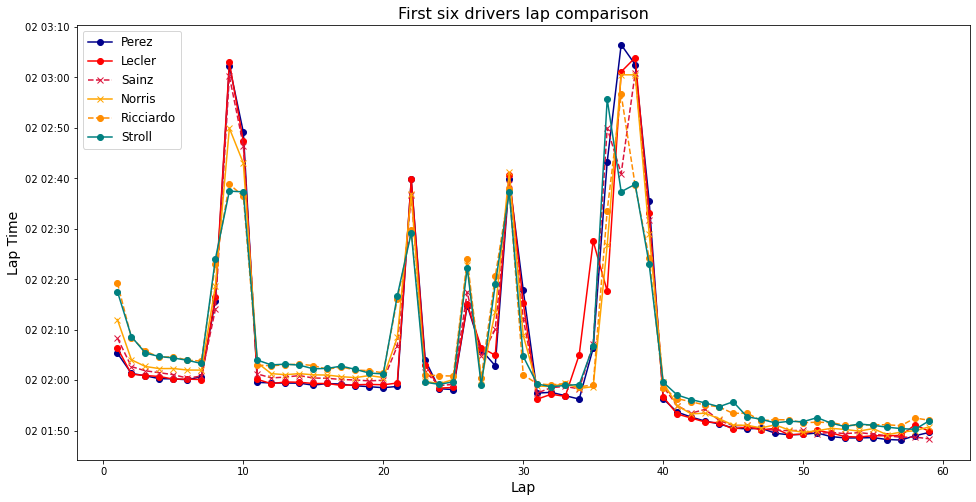

In [22]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(x,yP, color='darkblue', linestyle='solid', marker='o', label='Perez')
ax.plot(x,yL,'ro-', label='Lecler')
ax.plot(x,yS, color='crimson', linestyle='dashed', marker='x', label='Sainz')
ax.plot(x,yN, color='orange', linestyle='solid', marker='x', label='Norris')
ax.plot(x,yR, color='darkorange', linestyle='dashed', marker='o', label='Ricciardo')
ax.plot(x,yST, color='teal', linestyle='solid', marker='o', label='Stroll')
ax.yaxis_date()
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_xlabel('Lap',fontsize=14)
ax.set_title('First six drivers lap comparison', fontsize=16)
ax.legend(loc='upper left', fontsize=12)
plt.show()
fig.savefig('First six drivers lap comparison.jpeg')

Particularly in this GP, there where a lot of Safety Cars and Virtual Safety Cars, so lets make a zoom between the normal race times which is between 1:50.000 and 2:10.000

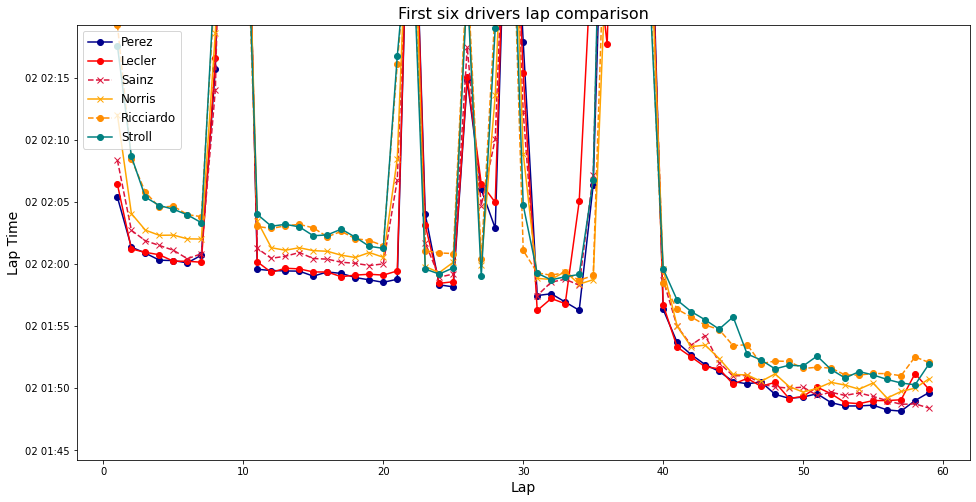

In [23]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(x,yP, color='darkblue', linestyle='solid', marker='o', label='Perez')
ax.plot(x,yL,'ro-', label='Lecler')
ax.plot(x,yS, color='crimson', linestyle='dashed', marker='x', label='Sainz')
ax.plot(x,yN, color='orange', linestyle='solid', marker='x', label='Norris')
ax.plot(x,yR, color='darkorange', linestyle='dashed', marker='o', label='Ricciardo')
ax.plot(x,yST, color='teal', linestyle='solid', marker='o', label='Stroll')
ax.yaxis_date()
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_ylim(bottom=None, top=yR[0])
ax.set_xlabel('Lap',fontsize=14)
ax.set_title('First six drivers lap comparison', fontsize=16)
ax.legend(loc='upper left', fontsize=12)
plt.show()
fig.savefig('First six drivers lap comparison zoom.jpeg')

The fastest cars through the entire grand prix where Perez, Leclerc, Sainz. Norris, Ricciardo and Stroll ended in those position more from the mistakes of others drivers like Verstappen and Lewis, and constructor problems like the one with Alpine and Alonso. Let's make an analysis in the laps after the 40+

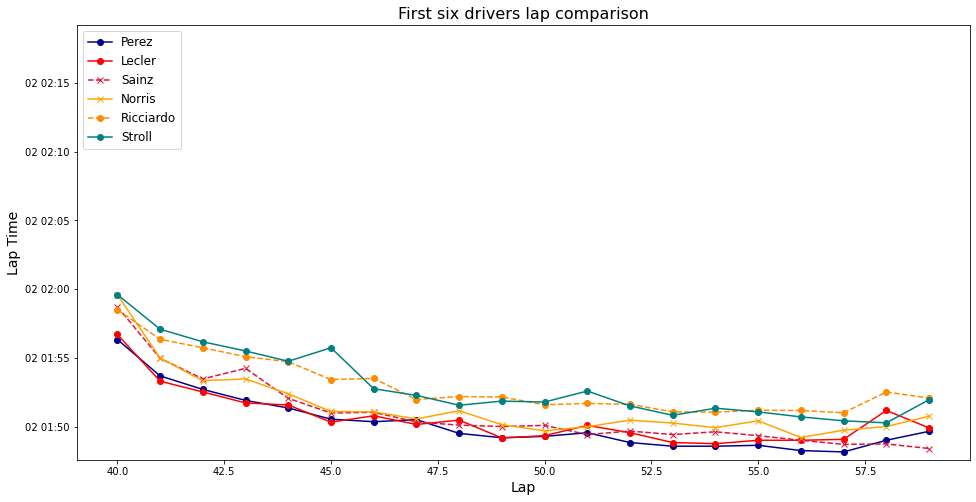

In [24]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(x[39:],yP[39:], color='darkblue', linestyle='solid', marker='o', label='Perez')
ax.plot(x[39:],yL[39:],'ro-', label='Lecler')
ax.plot(x[39:],yS[39:], color='crimson', linestyle='dashed', marker='x', label='Sainz')
ax.plot(x[39:],yN[39:], color='orange', linestyle='solid', marker='x', label='Norris')
ax.plot(x[39:],yR[39:], color='darkorange', linestyle='dashed', marker='o', label='Ricciardo')
ax.plot(x[39:],yST[39:], color='teal', linestyle='solid', marker='o', label='Stroll')
ax.yaxis_date()
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_ylim(bottom=None, top=yR[0])
ax.set_xlabel('Lap',fontsize=14)
ax.set_title('First six drivers lap comparison', fontsize=16)
ax.legend(loc='upper left', fontsize=12)
plt.show()
fig.savefig('First six drivers lap comparison +40 lap.jpeg')

Regarding the fight for the win between Perez and Leclerc, thew were so close between laps 40 to 55, but at the end Leclerc loose up and make a gap of more of 5 seconds

This time the fastest lap was achieved by George Russell in lap 54 with 1:46.458, but he ended in position 14th.

## Tyres times comparison 

For the tyre time comparison, the times during the virtual safety cars or safety cars will not taken in count.

First let's check the average lap time tyres comparison of Checo Perez

In [25]:
per1 = list(range(0,7))+list(range(10,21))+list(range(23,25))+list(range(30,34))
per_1i = lap_per.iloc[per1]
per_2m = lap_per.iloc[40:]

In [26]:
yP_1i = mdates.datestr2num(list(per_1i['Time PER']))
yP_2m = mdates.datestr2num(list(per_2m['Time PER']))

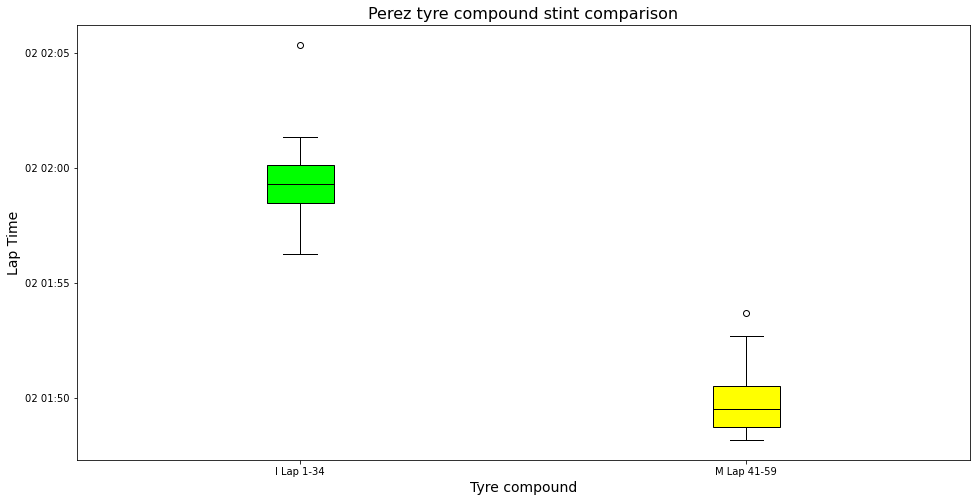

In [27]:
fig, ax = plt.subplots(figsize=(16,8))
bplotP = ax.boxplot((yP_1i,yP_2m),
          patch_artist=True,
          labels = ['I Lap 1-34','M Lap 41-59'],
          medianprops=dict(color='black'))
ax.yaxis_date()
ax.set_xlabel('Tyre compound', fontsize=14)
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_title('Perez tyre compound stint comparison', fontsize=16)
bplotP['boxes'][0].set_facecolor('lime')
bplotP['boxes'][1].set_facecolor('yellow')
plt.show
fig.savefig('Sergio Perez BP Tyre.jpeg')

Now let's check the times from Leclerc

In [28]:
lec1 = list(range(0,7))+list(range(10,21))+list(range(23,25))+list(range(30,33))
lec_1i = lap_lec.iloc[lec1]
lec_2m = lap_lec.iloc[40:]

In [29]:
yL_1i = mdates.datestr2num(list(lec_1i['Time LEC']))
yL_2m = mdates.datestr2num(list(lec_2m['Time LEC']))

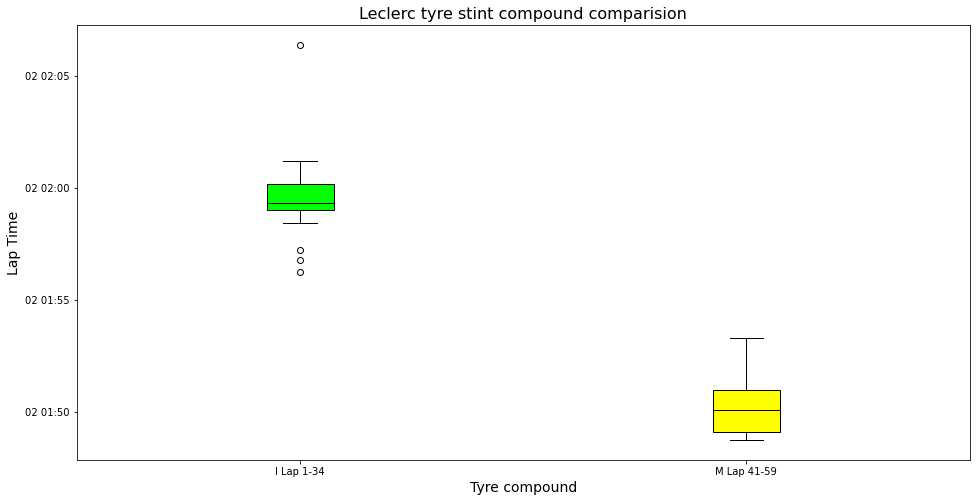

In [30]:
fig, ax = plt.subplots(figsize=(16,8))
bplotL = ax.boxplot((yL_1i, yL_2m),
          patch_artist=True,
          labels = ['I Lap 1-34','M Lap 41-59'],
          medianprops=dict(color='black'))
bplotL['boxes'][0].set_facecolor('lime')
bplotL['boxes'][1].set_facecolor('yellow')
ax.yaxis_date()
ax.set_xlabel('Tyre compound', fontsize=14)
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_title('Leclerc tyre stint compound comparision', fontsize=16)
plt.show
fig.savefig('Charles Leclerc BP Tyre.jpeg')

Now let's check for the average lap time of Sainz

In [31]:
sai1 = list(range(0,7))+list(range(10,20))+list(range(22,25))+list(range(30,34))
sai_1i = lap_sai.iloc[sai1]
sai_2m = lap_sai.iloc[40:]

In [32]:
yS_1i = mdates.datestr2num(list(sai_1i['Time SAI']))
yS_2m = mdates.datestr2num(list(sai_2m['Time SAI']))

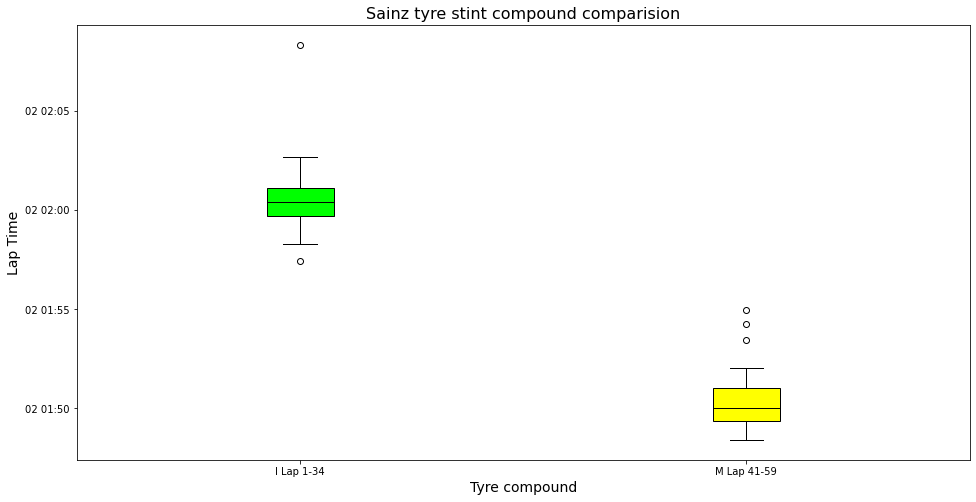

In [33]:
fig, ax = plt.subplots(figsize=(16,8))
bplotS = ax.boxplot((yS_1i,yS_2m),
          patch_artist=True,
          labels = ['I Lap 1-34','M Lap 41-59'],
          medianprops=dict(color='black'))
bplotS['boxes'][0].set_facecolor('lime')
bplotS['boxes'][1].set_facecolor('yellow')
ax.yaxis_date()
ax.set_xlabel('Tyre compound', fontsize=14)
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_title('Sainz tyre stint compound comparision', fontsize=16)
plt.show
fig.savefig('Carlos Sainz BP Tyre.jpeg')

Next one is the lap time average of Norris

In [34]:
nor1 = list(range(0,7))+list(range(10,20))+list(range(22,25))+list(range(30,35))
nor_1i = lap_nor.iloc[nor1]
nor_2m = lap_nor.iloc[40:]

In [35]:
yN_1i = mdates.datestr2num(list(nor_1i['Time NOR']))
yN_2m = mdates.datestr2num(list(nor_2m['Time NOR']))

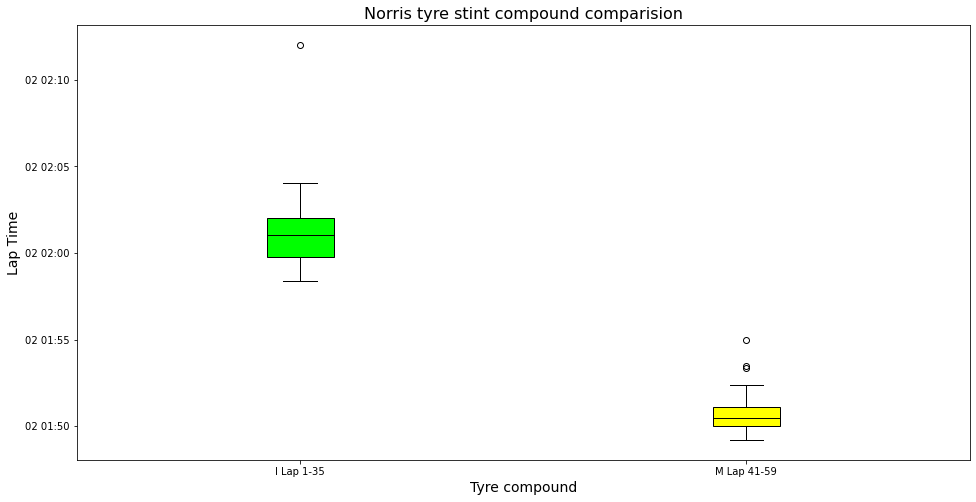

In [36]:
fig, ax = plt.subplots(figsize=(16,8))
bplotN = ax.boxplot((yN_1i,yN_2m),
          patch_artist=True,
          labels = ['I Lap 1-35','M Lap 41-59'],
          medianprops=dict(color='black'))
bplotN['boxes'][0].set_facecolor('lime')
bplotN['boxes'][1].set_facecolor('yellow')
ax.yaxis_date()
ax.set_xlabel('Tyre compound', fontsize=14)
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_title('Norris tyre stint compound comparision', fontsize=16)
plt.show
fig.savefig('Norris BP Tyre.jpeg')

Now for Daniel Ricciardo

In [37]:
ric1 = list(range(0,7))+list(range(10,20))+list(range(22,25))+list(range(29,35))
ric_1i = lap_ric.iloc[ric1]
ric_2s = lap_ric.iloc[40:]

In [38]:
yR_1i = mdates.datestr2num(list(ric_1i['Time RIC']))
yR_2s = mdates.datestr2num(list(ric_2s['Time RIC']))

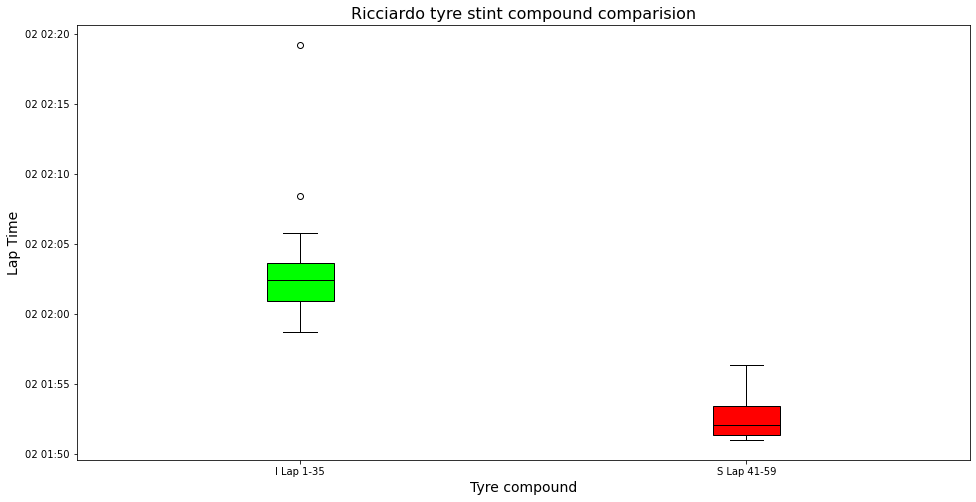

In [39]:
fig, ax = plt.subplots(figsize=(16,8))
bplotR = ax.boxplot((yR_1i,yR_2s),
          patch_artist=True,
          labels = ['I Lap 1-35','S Lap 41-59'],
          medianprops=dict(color='black'))
bplotR['boxes'][0].set_facecolor('lime')
bplotR['boxes'][1].set_facecolor('red')
ax.yaxis_date()
ax.set_xlabel('Tyre compound', fontsize=14)
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_title('Ricciardo tyre stint compound comparision', fontsize=16)
plt.show
fig.savefig('Ricciardo BP Tyre.jpeg')

And finally for Stroll.

In [40]:
str1 = list(range(0,7))+list(range(10,20))+list(range(22,25))+list(range(30,34))
str_1i = lap_str.iloc[str1]
str_2m = lap_str.iloc[40:]

In [41]:
yST_1i = mdates.datestr2num(list(str_1i['Time STR']))
yST_2m = mdates.datestr2num(list(str_2m['Time STR']))

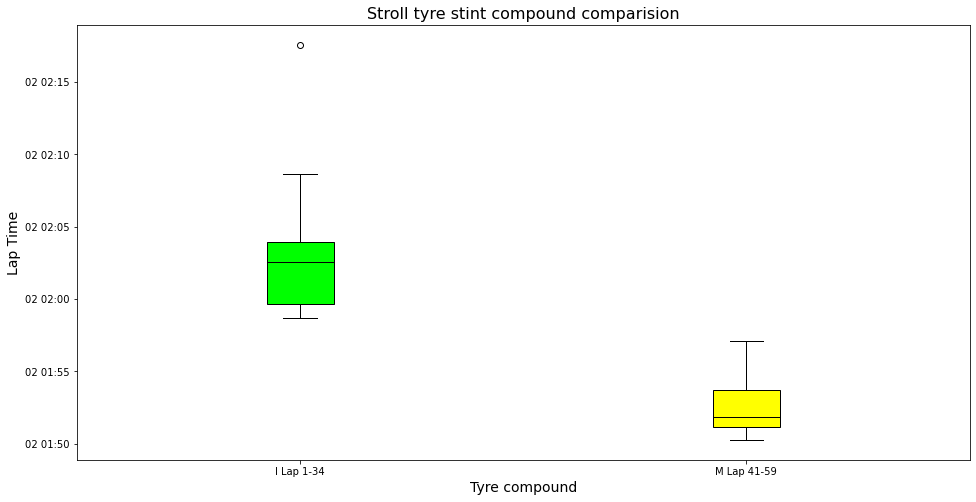

In [42]:
fig, ax = plt.subplots(figsize=(16,8))
bplotST = ax.boxplot((yST_1i,yST_2m),
          patch_artist=True,
          labels = ['I Lap 1-34','M Lap 41-59'],
          medianprops=dict(color='black'))
bplotST['boxes'][0].set_facecolor('lime')
bplotST['boxes'][1].set_facecolor('yellow')
ax.yaxis_date()
ax.set_xlabel('Tyre compound', fontsize=14)
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_title('Stroll tyre stint compound comparision', fontsize=16)
plt.show
fig.savefig('Stroll BP Tyre.jpeg')

# Comparison time laps between pilots

Finally let's make a comparison between the pilots, the first stint is from lap 1 to lap 34, all drivers have Wet Intermediates, the times doesn't take in count the safety car and virtual safety cars time laps.

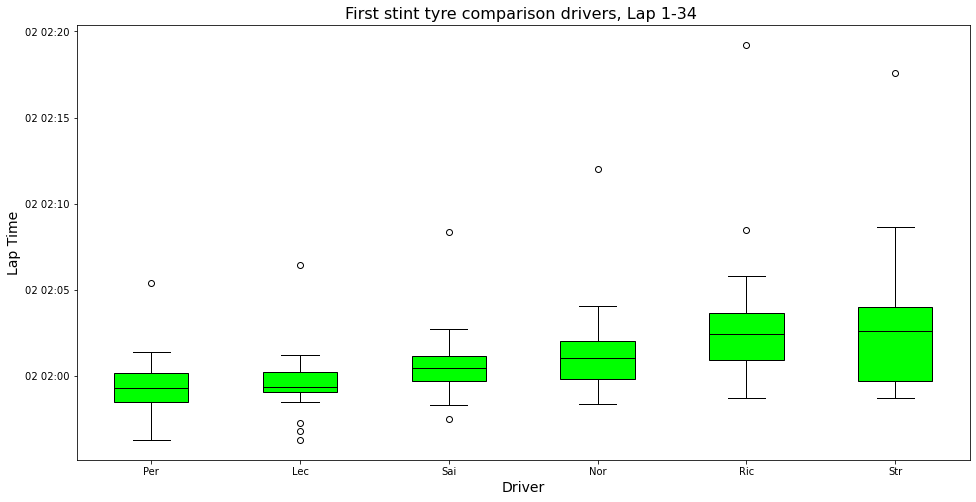

In [43]:
fig, ax = plt.subplots(figsize=(16,8))
bplot1 = ax.boxplot((yP_1i,yL_1i,yS_1i,yN_1i,yR_1i,yST_1i),
          patch_artist=True,
          labels = ['Per','Lec','Sai','Nor','Ric','Str'],
          medianprops=dict(color='black'))
bplot1['boxes'][0].set_facecolor('lime')
bplot1['boxes'][1].set_facecolor('lime')
bplot1['boxes'][2].set_facecolor('lime')
bplot1['boxes'][3].set_facecolor('lime')
bplot1['boxes'][4].set_facecolor('lime')
bplot1['boxes'][5].set_facecolor('lime')
ax.yaxis_date()
ax.set_xlabel('Driver', fontsize=14)
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_title('First stint tyre comparison drivers, Lap 1-34 ', fontsize=16)
plt.show
fig.savefig('First stint tyre.jpeg')

Now for the second stint which began with the end of the last Safety Car in the lap 41 till the end.

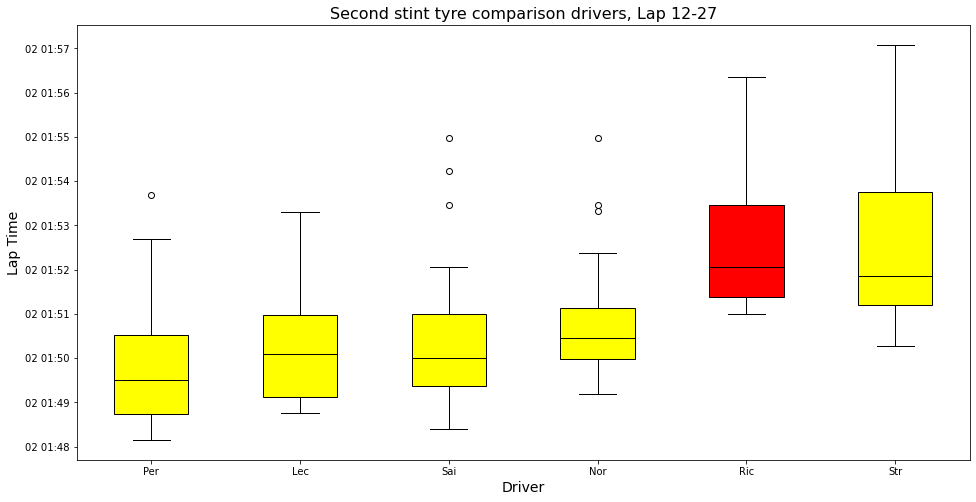

In [44]:
fig, ax = plt.subplots(figsize=(16,8))
bplot2 = ax.boxplot((yP_2m,yL_2m,yS_2m,yN_2m,yR_2s,yST_2m),
          patch_artist=True,
          labels = ['Per','Lec','Sai','Nor','Ric','Str'],
          medianprops=dict(color='black'))
bplot2['boxes'][0].set_facecolor('yellow')
bplot2['boxes'][1].set_facecolor('yellow')
bplot2['boxes'][2].set_facecolor('yellow')
bplot2['boxes'][3].set_facecolor('yellow')
bplot2['boxes'][4].set_facecolor('red')
bplot2['boxes'][5].set_facecolor('yellow')
ax.yaxis_date()
ax.set_xlabel('Driver', fontsize=14)
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_title('Second stint tyre comparison drivers, Lap 12-27', fontsize=16)
plt.show
fig.savefig('Second stint tyre comparison.jpeg')

# Timeseries for race position

Finally a time series plot for the position of the first 6 drivers.

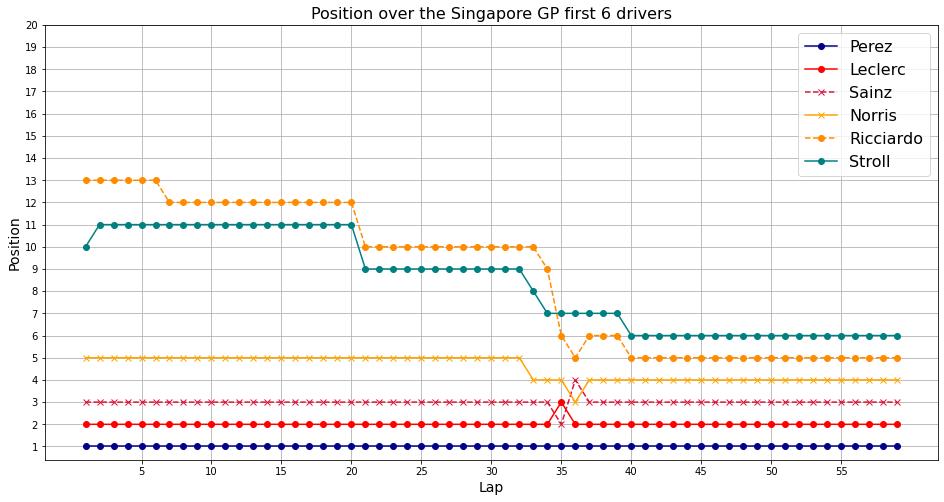

In [45]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(x, lap_per['Pos'], color='darkblue', linestyle='solid', marker='o', label='Perez')
ax.plot(x, lap_lec['Pos'], 'ro-', label='Leclerc')
ax.plot(x, lap_sai['Pos'], color='crimson', linestyle='dashed', marker='x', label='Sainz')
ax.plot(x, lap_nor['Pos'], color='orange', linestyle='solid', marker='x', label='Norris')
ax.plot(x, lap_ric['Pos'], color='darkorange', linestyle='dashed', marker='o', label='Ricciardo')
ax.plot(x, lap_str['Pos'], color='teal', linestyle='solid', marker='o', label='Stroll')
ax.set_ylabel('Position', fontsize=14)
ax.set_xlabel('Lap', fontsize=14)
ax.set_title('Position over the Singapore GP first 6 drivers', fontsize=16)
ax.legend(loc='upper right', fontsize=16)
plt.yticks(list(range(1,21)))
plt.xticks(list(range(5,60,5)))
ax.grid(True)
plt.show()
fig.savefig('Position over the Singapore GP first 6 drivers.jpeg')